# 8. Discrete Probability Distributions

We use `scipy.stats` to demonstrate the pdf, cdf, and sampling from several distribution families. First we import a few helpful libraries. 

In [2]:
from scipy.stats import bernoulli, binom, poisson
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

## 8.1 Bernoulli

Let's explore the basic methods for a Bernoulli random variable. 

In [3]:
print(bernoulli.pmf(0,p=.3))

0.7000000000000001


In [4]:
print(bernoulli.pmf(range(3),p=.3))

[0.7 0.3 0. ]


In [5]:
print(bernoulli.cdf([0,.5,1,1.5],p=.3))

[0.7 0.7 1.  1. ]


Next plot the pdf and cdf. For simplicity we are omitting labels and legend, we will see how to plot them in the next subsection. 

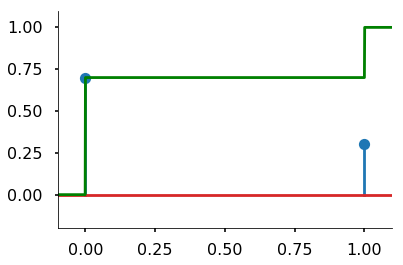

In [6]:
plt.stem([-0.2,0,1,1.2],bernoulli.pmf([-0.2,0,1,1.2],p=.3))
plt.plot(np.linspace(-0.1,1.1,1200),bernoulli.cdf(np.linspace(-0.1,1.1,1200),p=0.3),'g')
plt.xlim([-0.1,1.1])
plt.ylim([-0.2,1.1])
plt.show()

Next we generate and then plot Bernoulli samples.

In [7]:
print(bernoulli.rvs(size=10,p=0.3))

[0 1 1 0 0 1 0 0 0 1]


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


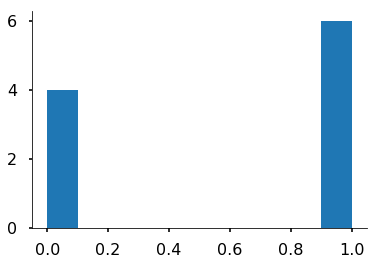

In [8]:
plt.hist(bernoulli.rvs(size=10,p=0.3),normed=True)
plt.show()

## 8.2 Binomial

You can calculate the pdf and cdf of the Binomial distribution the same way we did for Bernoulli, just replace `bernoulli.pmf` by `binom.pmf` etc. and including the appropriate arguments. Here is one example.

In [9]:
print(binom.rvs(size=50,n=20, p=0.4))

[10 11  8  9  9  7  6  7  7 10  8  8  8  8  9  5  7  9  9  9 13  6  8  5
  9  9  6  7 13 11  7  9  6  5  7  9  7  8  6  7  8  9 10  6  8  6 11  6
  7  8]


The following code plots the probability mass function (PMF) of $B_{p,n}$, the binomial distribution with parameters $p$ and $n$. It contains interactive sliders that you can use to vary $n$ over the interval $[0,30]$ and $p$ over the interval $[0, 1]$.

In [31]:
@widgets.interact(n=(0,30),p=(0.0,1.0),samples=(1,1000), continuous_update=False)
def plot_pmf(n, p,samples=100,histogram=False):
    '''
    Plot the probability mass function of Binom(n, p)
    '''
    k = np.arange(0, n + 1)
    P_binom = binom.pmf(k, n, p)
    # This plots a bar plot
    # plt.bar(k, P_binom,color='b')
    plt.plot(k, P_binom, '-o', color='r')
    if histogram:
        height,y = np.histogram(binom.rvs(size=samples,n=n,p=p),range=(0,n),bins=n+1,normed=True)
        plt.bar(k,height,color='r')
    plt.title('PMF of Bin(%i, %.2f)' % (n, p))
    plt.xlabel('k')
    plt.ylabel('$B_{20,0.3}(k)$')
    plt.show()

A Jupyter Widget

## 8.3 Poisson

### 8.3.1 PMF
We follow the same procedure to plot the Poisson PMF.

In [29]:
@widgets.interact(n=(0,50),samples=(1,1000),λ=(0.0,30.0))
def f(n, λ, samples=100,histogram=False):
    k = np.arange(0, n+1)
    P_poisson = poisson.pmf(k, λ)
    plt.plot(k, P_poisson, '-o')
    if histogram:
        height,y = np.histogram(poisson.rvs(size=samples,mu=λ),range=(0,n),bins=n+1,normed=True)
        plt.bar(k,height,color='r')
    plt.title('PMF of Poisson(%i)' %λ)
    plt.xlabel('Number of Events')
    plt.ylabel('Probability of Number of Events')
    plt.show()

A Jupyter Widget

### 8.3.2 Poisson Approximation of the Binomial Distribution
Observe how well Poisson$(np)$ approximates Binomial$(n, p)$ for small values of $p$.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

e = np.e
@widgets.interact(n=(2,1000),p=(0.0,.2,0.001),continuous_update=False)
def f(n, p):
    k = np.arange(0, n+1)
    x = np.linspace(0, n+1, 1000)
    λ = n*p
    stddev = λ**0.5
    P_poisson = poisson.pmf(k, λ)
    P_binom = binom.pmf(k, n, p)
    plt.plot(k, P_poisson, 'r', label = "Poisson(%0.2f)" %λ)
    plt.plot(k, P_binom, 'b-', label = "Bin(%i, %0.2f)" %(n,p))
    plt.title('Poisson Approximation of Binomial')
    plt.xlabel('n')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    print('|| P_Poisson - P_Binomial ||\u2081 = ',sum(abs(P_poisson-P_binom)))
   

A Jupyter Widget

## 8.4 Geometric Distribution
### 8.4.1 PMF and CDF

In [57]:
@widgets.interact(n=(1,200),p=(0.0,1.0))
def f(n, p, CDF=False):
    x = np.arange(1, n + 1)
    y = [((1 - p)**(z - 1)) * p for z in x]
    z = [(1 - (1 - p)**zz) for zz in x]
    plt.plot(x, y, 'o-', label='PDF')
    if CDF == True:
        plt.plot(x, z, 'ro-', label='CDF')
    if n == 1:
        plt.plot([0, 1], [p, p], 'b')
        plt.xticks([1])
    plt.xlabel('n')
    plt.ylabel('y')
    plt.title('PMF of Geometric(%0.2f)' % p, fontsize=20)
    plt.legend()
    plt.show()

A Jupyter Widget